In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import time
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway
from random import randint
from math import ceil

from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsRestClassifier

#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeCV

#imbalanced methods
from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import AllKNN

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## Features
- Race 
- Payer_code
- admission_type
- medical_specialty
- discharge_disposition
- admission_source 
- primary_diagnosis_types
- secondary_diagnosis_types
- additional_diagnosis_types
- glucose_test_result
- a1c_test_result 
- outpatient_visits
- emergency_visits
- inpatient_visits
- average_pulse_bpm
- length_of_stay
- number_lab_tests
- non_lab_procedures
- number_of_medications
- number_diagnoses
- race_caucasian
- number_generic_medications
- metformin
- insulin
- Sulfonylureas
- Meglitinides
- Thiazolidinediones
- Alpha_Glucosidase_Inhibitors
- Combination_Medications
- Midpoint_Age
- gender_binary
- presc_diabetes_meds_binary
- change_in_meds_binary
- Has_Insurance
- is_normal_pulse
- number_encounters_total
- Total_visits
- Serious_condition_visits


## Target Variables
- Readmitted_binary
- Readmitted_multiclass


### Read the files

In [2]:
X_multiclass = pd.read_csv('/Users/tomasverissimo/Desktop/Master/1st Year/1st Semester/Machine Learning/Project - Group 18/Final Notebooks/Multiclass/X_multiclass_ne.csv', index_col='encounter_id')
y_multiclass = pd.read_csv('/Users/tomasverissimo/Desktop/Master/1st Year/1st Semester/Machine Learning/Project - Group 18/Final Notebooks/Multiclass/y_multiclass_ne.csv', index_col='encounter_id')

In [3]:
X_multiclass.head()

,race,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,admission_source,...,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,NaN,0,0,2,Urgent/Emergency,Family_GeneralPractice,127,Discharged_to_home,Emergency_Room,...,0,0,0,Respiratory,Metabolic,Respiratory,0,6,2,2
426224,AfricanAmerican,NaN,0,0,0,Urgent/Emergency,Unknown,128,Transferred_to_another_medical_facility,Referral,...,1,0,0,Infectious_parasitic,Circulatory,Neoplasms,0,1,0,0
634063,Caucasian,NaN,0,0,1,Other_type,Family_GeneralPractice,94,Discharged_to_home,No_source,...,1,1,0,Digestive,Infectious_parasitic,Diabetes,1,1,1,1
890610,AfricanAmerican,MC,0,0,1,Urgent/Emergency,InternalMedicine,81,Discharged_to_home,Other_source,...,0,0,1,Digestive,Digestive,Circulatory,1,1,1,1
654194,Caucasian,HM,1,0,0,Elective,Unknown,126,Discharged_to_home,Referral,...,0,0,1,Musculoskeletal,Genitourinary,Circulatory,0,2,1,0


In [4]:
y_multiclass.head()

,readmitted_multiclass
encounter_id,
533253,>30 days
426224,No
634063,No
890610,No
654194,>30 days


In [ ]:
X_multiclass.shape

In [ ]:
y_multiclass.shape

In [5]:
X_multiclass.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'metformin', 'insulin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [6]:
y_multiclass.columns

Index(['readmitted_multiclass'], dtype='object')

In [7]:
X_multiclass.dtypes

race                             object
payer_code                       object
outpatient_visits                 int64
emergency_visits                  int64
inpatient_visits                  int64
admission_type                   object
medical_specialty                object
average_pulse_bpm                 int64
discharge_disposition            object
admission_source                 object
length_of_stay                    int64
number_lab_tests                  int64
non_lab_procedures                int64
number_of_medications             int64
number_diagnoses                  int64
glucose_test_result              object
a1c_test_result                  object
race_caucasian                    int64
number_generic_medications        int64
metformin                         int64
insulin                           int64
Sulfonylureas                     int64
Meglitinides                      int64
Thiazolidinediones                int64
Alpha_Glucosidase_Inhibitors      int64


In [8]:
y_multiclass.dtypes

readmitted_multiclass    object
dtype: object

In [9]:
X_multiclass.describe()

,outpatient_visits,emergency_visits,inpatient_visits,average_pulse_bpm,length_of_stay,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,race_caucasian,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
count,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,...,71236.000000,69019.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,0.369588,0.196249,0.640154,99.611222,4.391024,43.095654,1.340923,15.995452,7.421023,0.726866,...,0.007005,66.020299,0.463319,0.770537,0.461986,0.604119,0.487717,1.892807,1.205991,0.836403
std,1.287469,0.910854,1.267271,23.040521,2.988739,19.642919,1.706664,8.122347,1.937809,0.445572,...,0.083402,15.952361,0.498656,0.420490,0.498556,0.489043,0.499853,1.828928,2.295259,1.750186
min,0.000000,0.000000,0.000000,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,80.000000,2.000000,31.000000,0.000000,10.000000,6.000000,0.000000,...,0.000000,55.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,100.000000,4.000000,44.000000,1.000000,15.000000,8.000000,1.000000,...,0.000000,65.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,119.000000,6.000000,57.000000,2.000000,20.000000,9.000000,1.000000,...,0.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
max,42.000000,76.000000,21.000000,139.000000,14.000000,121.000000,6.000000,75.000000,16.000000,1.000000,...,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,80.000000,78.000000


In [10]:
X_multiclass.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,71236,6,Caucasian,51779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,43035,10,MC,22683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0
admission_type,71236,3,Urgent/Emergency,50779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty,71236,7,Unknown,34922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_pulse_bpm,71236.0,NaN,NaN,NaN,99.611222,23.040521,60.0,80.0,100.0,119.0,139.0
discharge_disposition,71236,7,Discharged_to_home,51342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_source,71236,4,Emergency_Room,40319,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
y_multiclass.describe()

,readmitted_multiclass
count,71236
unique,3
top,No
freq,38405


In [12]:
X_multiclass.isna().sum()

race                                0
payer_code                      28201
outpatient_visits                   0
emergency_visits                    0
inpatient_visits                    0
admission_type                      0
medical_specialty                   0
average_pulse_bpm                   0
discharge_disposition               0
admission_source                    0
length_of_stay                      0
number_lab_tests                    0
non_lab_procedures                  0
number_of_medications               0
number_diagnoses                    0
glucose_test_result                 0
a1c_test_result                     0
race_caucasian                      0
number_generic_medications          0
metformin                           0
insulin                             0
Sulfonylureas                       0
Meglitinides                        0
Thiazolidinediones                  0
Alpha_Glucosidase_Inhibitors        0
Combination_Medications             0
Midpoint_Age

In [13]:
y_multiclass.isna().sum()

readmitted_multiclass    0
dtype: int64

In [14]:
X_multiclass.duplicated().sum()

0

In [15]:
y_multiclass.duplicated().sum()

71233

### Visual Exploration


In [16]:
X_multiclass.dtypes

race                             object
payer_code                       object
outpatient_visits                 int64
emergency_visits                  int64
inpatient_visits                  int64
admission_type                   object
medical_specialty                object
average_pulse_bpm                 int64
discharge_disposition            object
admission_source                 object
length_of_stay                    int64
number_lab_tests                  int64
non_lab_procedures                int64
number_of_medications             int64
number_diagnoses                  int64
glucose_test_result              object
a1c_test_result                  object
race_caucasian                    int64
number_generic_medications        int64
metformin                         int64
insulin                           int64
Sulfonylureas                     int64
Meglitinides                      int64
Thiazolidinediones                int64
Alpha_Glucosidase_Inhibitors      int64


In [17]:
metric_features = X_multiclass.select_dtypes(include=['int64', 'float64'])

In [18]:
non_metric_features = non_metric_features = X_multiclass.select_dtypes(exclude=['int64', 'float64'])

"Numeric Variables' Box Plots"

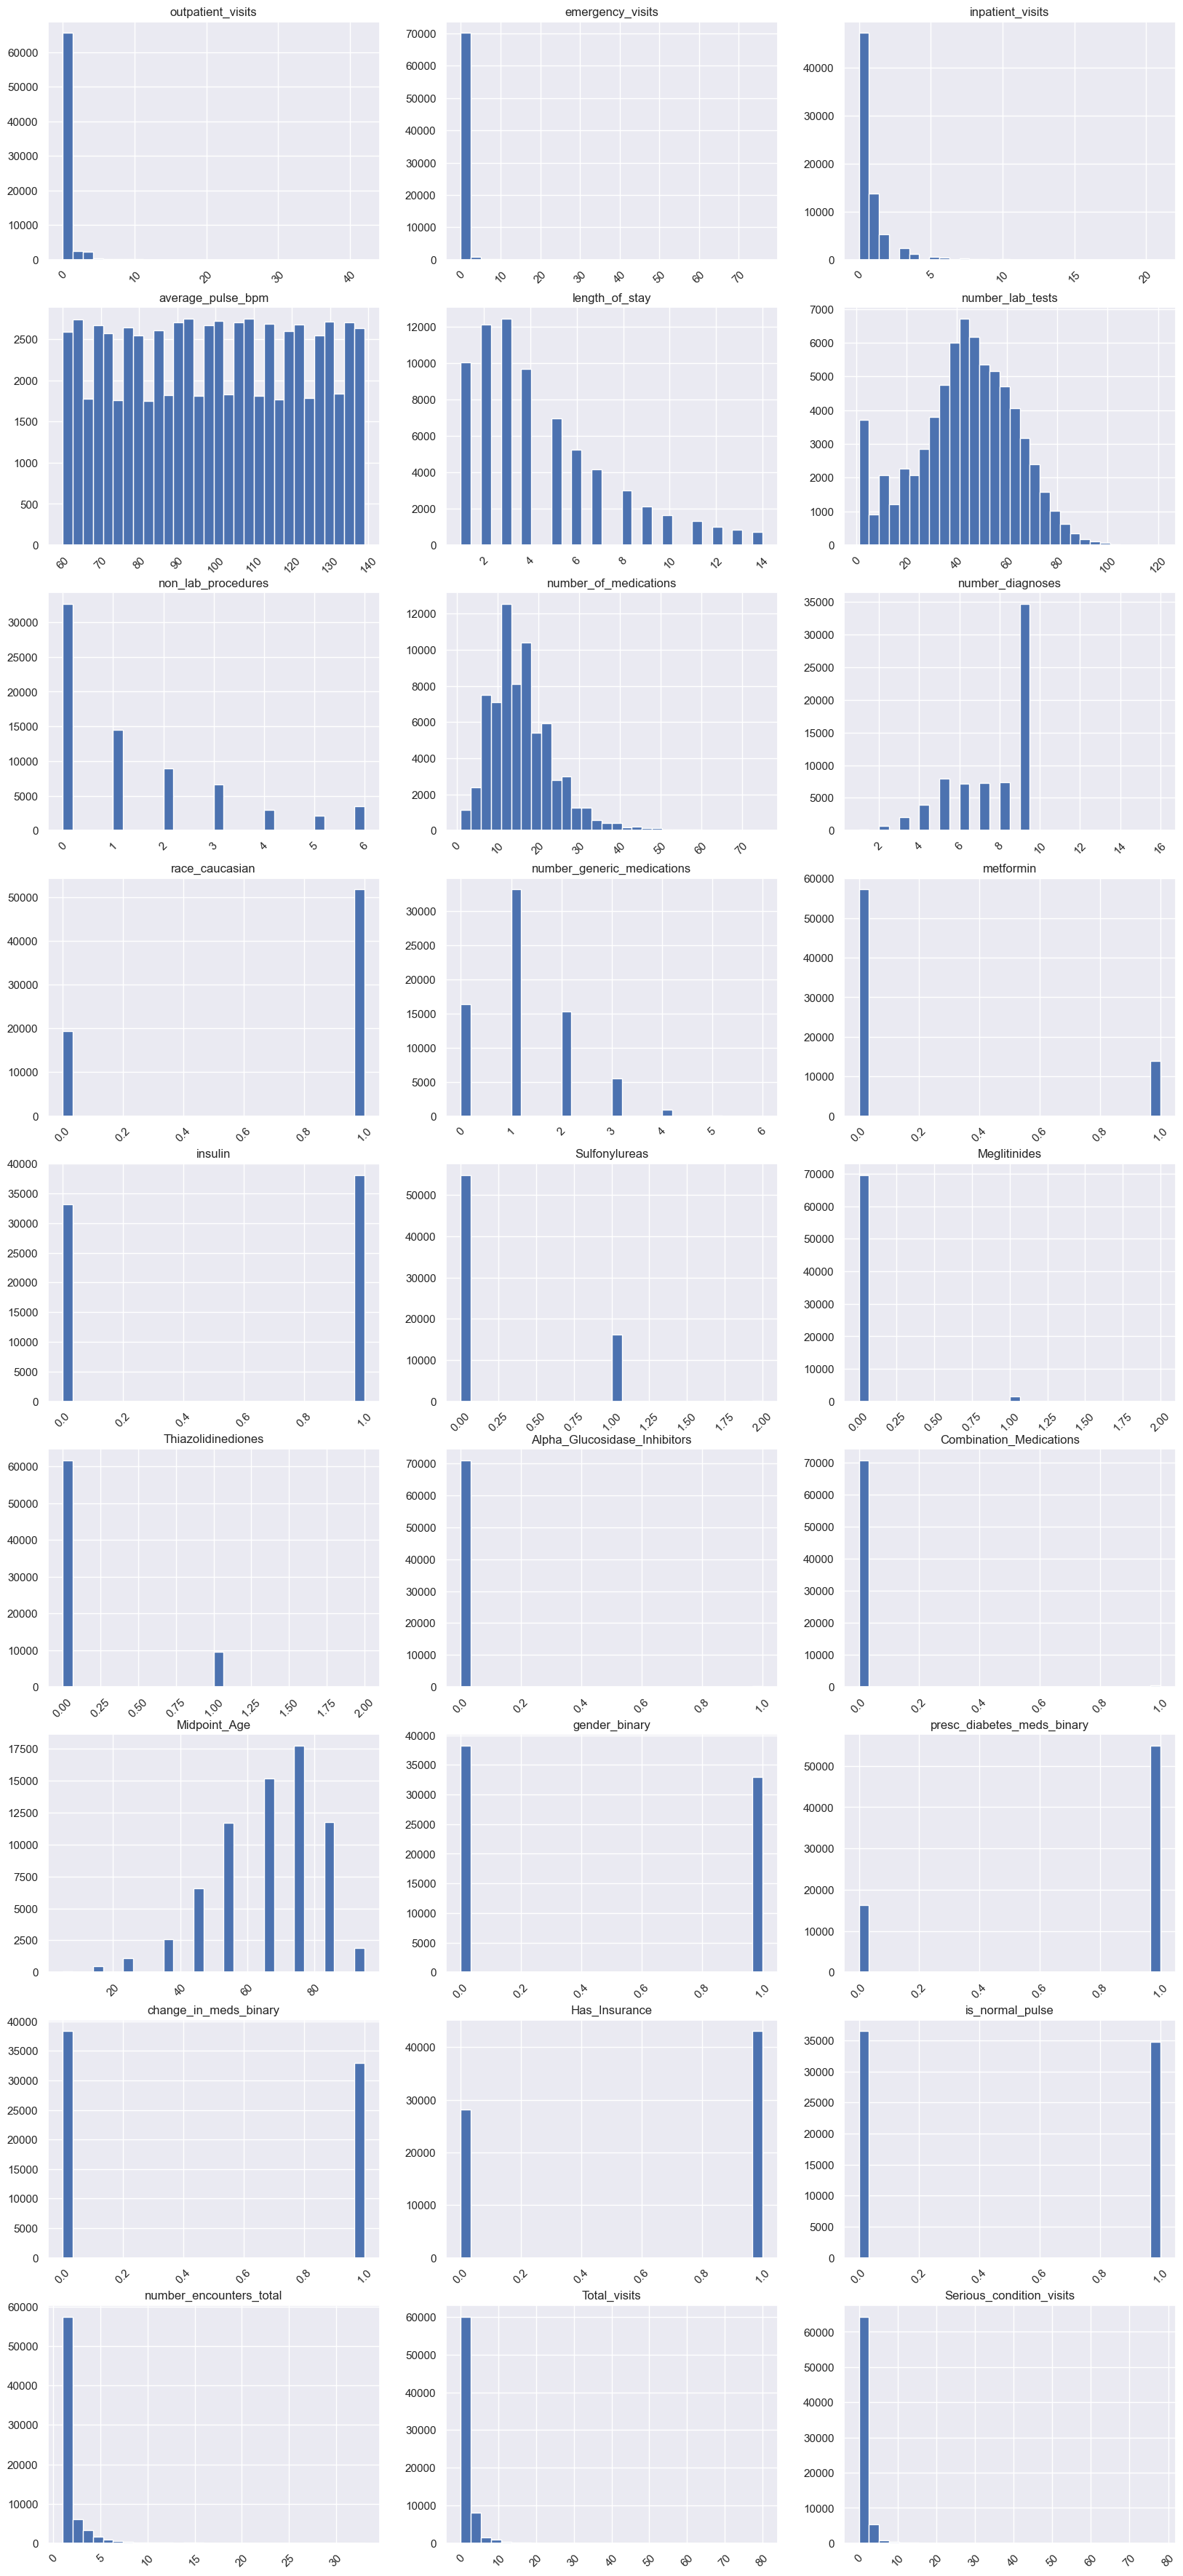

In [21]:

sns.set()

# Calculate the number of rows needed with a max of 3 histograms per row
n_cols = 3
n_rows = ceil(len(metric_features.columns) / n_cols)

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))  # Adjust the figure size as needed

# Flatten the axes array for easy iteration and remove any excess axes
axes = axes.flatten()
for i in range(len(metric_features.columns), len(axes)):
    fig.delaxes(axes[i])

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes, metric_features.columns):  # Iterate over column names
    ax.hist(metric_features[feat], bins=30)  # Set a standard number of bins
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Layout
# Add a centered title to the figure and adjust the layout
title


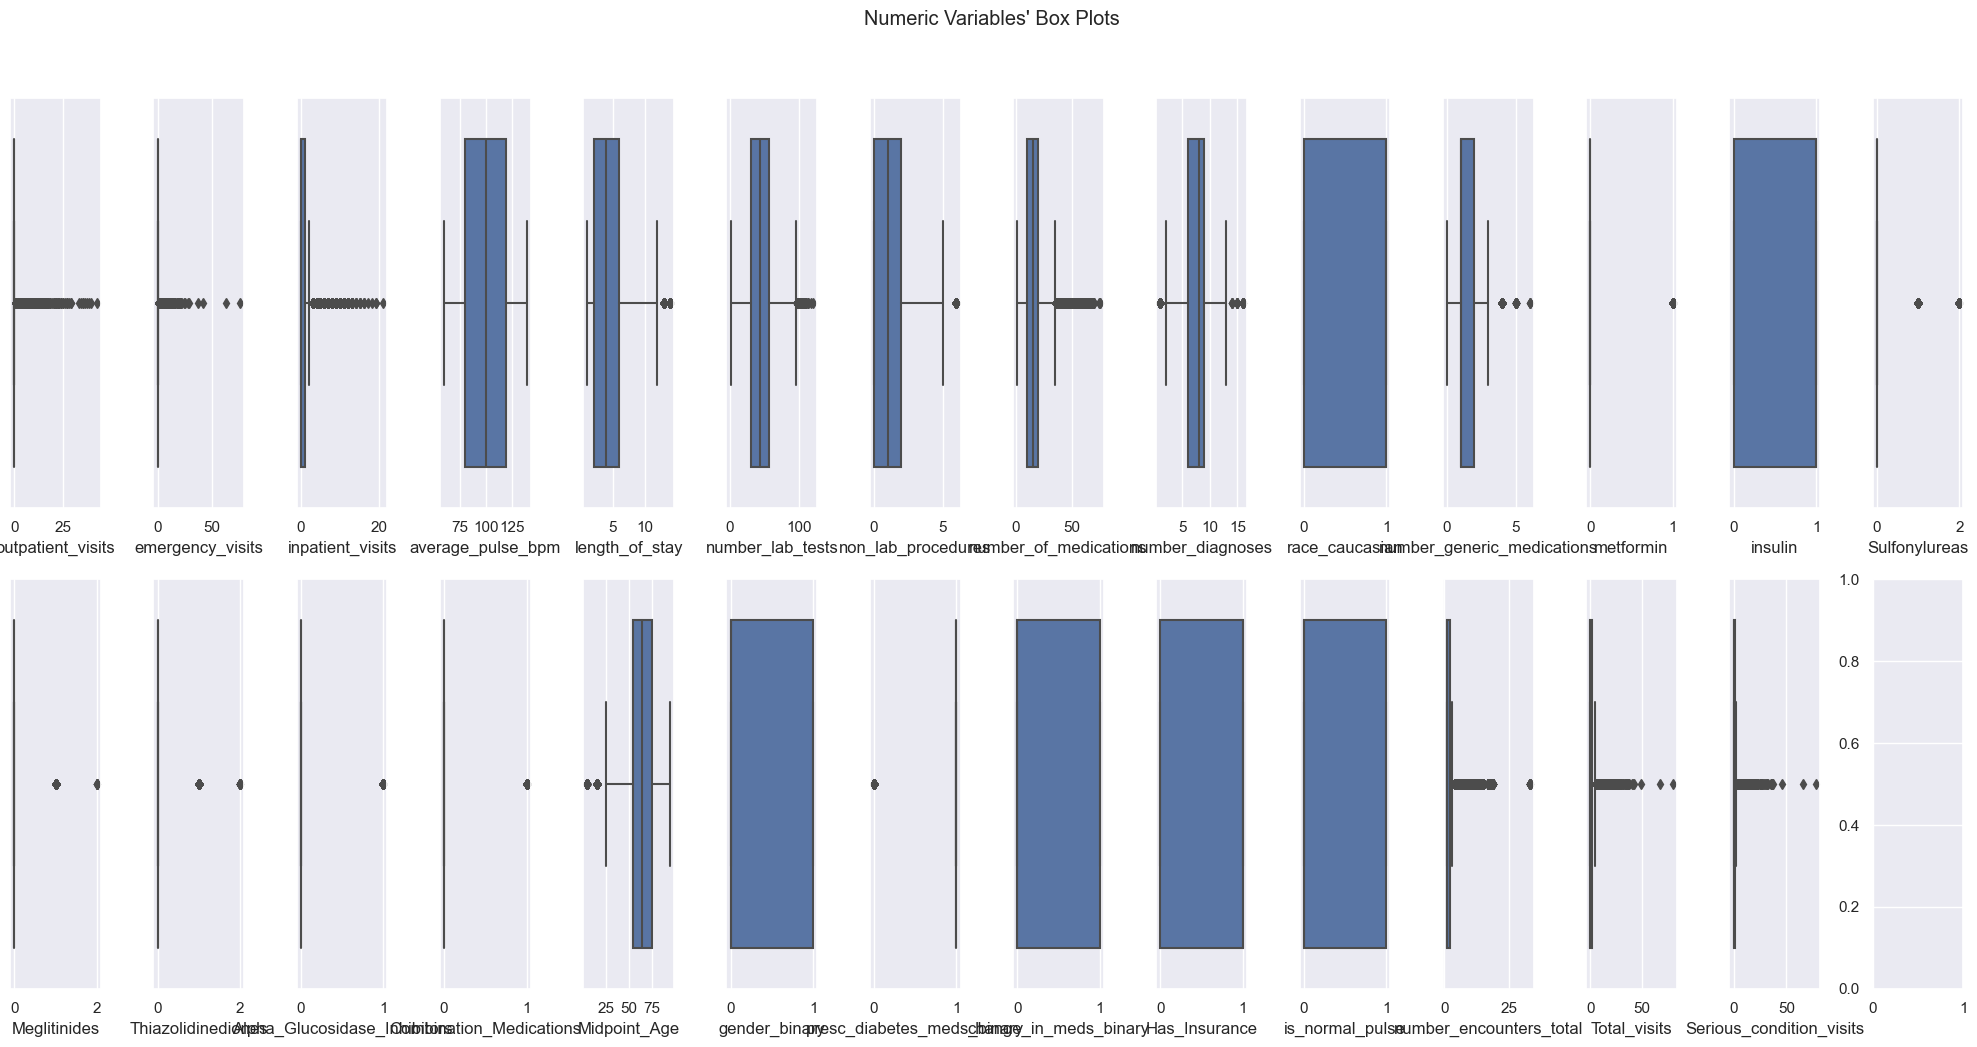

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# Assuming 'metric_features' is a DataFrame with your data
# Replace 'metric_features' with the actual name of your DataFrame

# sns.set() is used to set the aesthetic parameters in one step.
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed.
# The 'ceil' function should be from the 'math' library.
fig, axes = plt.subplots(2, ceil(len(metric_features.columns) / 2), figsize=(20, 11))

# Flatten the axes array for easy iteration.
axes = axes.flatten()

# Plot data.
# Iterate across axes objects and associate each box plot.
for ax, feat in zip(axes, metric_features.columns):  # Use .columns to iterate over column names
    sns.boxplot(x=metric_features[feat], ax=ax)  # Plot boxplot for each feature

# Layout.
# Add a centered title to the figure.
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

# Adjust layout for a clean look.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot.
plt.show()


### Non-metrical

In [ ]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=X_[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()

### Correlation Matrix

In [ ]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(X_multiclass[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'correlation_matrix.png'), dpi=200)

plt.show()